### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas as pd

Data preprocessing is done using the test, validation and test data. We have done the training considering the data availbale.

The model that we chose is Stacked LSTM:
Stock market prediction is the act of trying to determine the future value of a company stock or other financial instrument traded on a financial exchange.

Aim/Objective:
In the past decades, there is an increasing interest in predicting markets among economists, policymakers, academics and market makers. The objective of the proposed work is to study and improve the supervised learning algorithms to predict the stock price.


Training was done under the following metrics and functions:
• Number of layers = 4
• Loss Function= Mean Square Error
• Optimizer = Adam
• Epochs = 100
• Batch size = 64

The proposed Stock Price Predictor has been successfully trained by using LSTM
learning model on the sample datasets and the Stock value prediction process has
been successfully performed by the trained LSTM model being tested on the test
data set

We would say considering the long run and the future predictions , we suggest to choose LSTM over any other model.

Main reason to choose this is the previous data has huge impact on the near future, considering the dataset.
Here since the data is just 49% , we say this isnt proper , but considering the remaining 51% , this should do good.

In [2]:
df=pd.read_csv('../input/data-analytics-ue20cs312/train.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2016-01-04,1099.59,1110.75,1093.85,1109.64,66545000
1,2016-01-05,1117.47,1130.57,1112.75,1125.85,41227200
2,2016-01-06,1116.63,1138.68,1116.10,1133.04,42316800
3,2016-01-07,1122.00,1149.76,1117.56,1143.37,64899600
4,2016-01-08,1145.64,1149.96,1120.93,1122.88,52138900


In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume
1650,2022-07-25,2412.25,2429.44,2387.41,2402.95,29106300
1651,2022-07-26,2289.29,2307.08,2255.66,2280.27,48503400
1652,2022-07-27,2309.14,2404.25,2296.82,2395.54,43790900
1653,2022-07-28,2385.58,2443.26,2377.34,2434.89,25807000
1654,2022-07-29,2410.86,2479.24,2406.35,2474.93,32907600


In [5]:
df1=df.reset_index()['Close']

In [6]:
df1

0       1109.64
1       1125.85
2       1133.04
3       1143.37
4       1122.88
         ...   
1650    2402.95
1651    2280.27
1652    2395.54
1653    2434.89
1654    2474.93
Name: Close, Length: 1655, dtype: float64

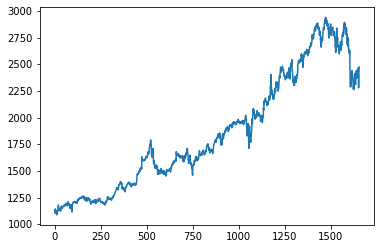

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [9]:
import numpy as np

In [10]:
df1

0       1109.64
1       1125.85
2       1133.04
3       1143.37
4       1122.88
         ...   
1650    2402.95
1651    2280.27
1652    2395.54
1653    2434.89
1654    2474.93
Name: Close, Length: 1655, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[0.01192852]
 [0.02066998]
 [0.02454729]
 ...
 [0.70536783]
 [0.72658786]
 [0.74817998]]


In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(1075, 580)

In [15]:
train_data

array([[0.01192852],
       [0.02066998],
       [0.02454729],
       ...,
       [0.45932333],
       [0.4622731 ],
       [0.46221918]])

In [16]:
train_data.shape

(1075, 1)

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(974, 100)
(974,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(479, 100)
(479,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
import tensorflow
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


2022-10-16 12:32:00.619948: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

2022-10-16 12:32:01.708886: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
16/16 [==============================] - 12s 372ms/step - loss: 0.0195 - val_loss: 0.1176
Epoch 2/100
16/16 [==============================] - 4s 282ms/step - loss: 0.0029 - val_loss: 0.0277
Epoch 3/100
16/16 [==============================] - 5s 320ms/step - loss: 9.5343e-04 - val_loss: 0.0028
Epoch 4/100
16/16 [==============================] - 4s 281ms/step - loss: 5.5631e-04 - val_loss: 0.0032
Epoch 5/100
16/16 [==============================] - 4s 283ms/step - loss: 4.9550e-04 - val_loss: 0.0026
Epoch 6/100
16/16 [==============================] - 4s 282ms/step - loss: 4.5855e-04 - val_loss: 0.0026
Epoch 7/100
16/16 [==============================] - 4s 277ms/step - loss: 4.4498e-04 - val_loss: 0.0037
Epoch 8/100
16/16 [==============================] - 4s 275ms/step - loss: 4.4015e-04 - val_loss: 0.0042
Epoch 9/100
16/16 [==============================] - 5s 284ms/step - loss: 4.3087e-04 - val_loss: 0.0054
Epoch 10/100
16/16 [==============================] - 5s 317ms

In [27]:
import tensorflow as tf

In [28]:
### prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1571.056210056314

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

2600.356415942378

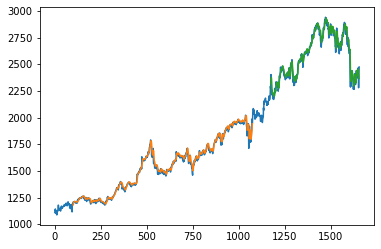

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

580

In [34]:
x_input=test_data[480:].reshape(1,-1)
x_input.shape

(1, 100)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.8325478057356097,
 0.8678857623572298,
 0.8782881610025992,
 0.8648658850936701,
 0.8576451428509799,
 0.8804020750870911,
 0.8971785718137599,
 0.8997562527637271,
 0.9125260194782083,
 0.9048037619042482,
 0.9210625653857354,
 0.9030781177536427,
 0.9212674856286198,
 0.9253766757622492,
 0.9403412461307823,
 0.9529114852403497,
 0.9632761354199249,
 0.9440082399508192,
 0.9597116017213301,
 0.9740290555333857,
 0.9638153992169891,
 0.9635996936981632,
 0.9684800310615946,
 0.9617985526159687,
 0.925926724835255,
 0.9138040746772507,
 0.9438518534496705,
 0.9294858658958789,
 0.9261532156300218,
 0.9472168595433514,
 0.9477992644441806,
 0.9345926940540774,
 0.8950107313495617,
 0.9112102158133715,
 0.8858648173513519,
 0.8611395722559563,
 0.8908098663704311,
 0.853854118357618,
 0.8577152471445983,
 0.8647688176101986,
 0.8957387374755983,
 0.8600340814719745,
 0.8377840572051036,
 0.8363280449530299,
 0.8309785480861527,
 0.8195461555883907,
 0.8152482231257887,
 0.832957646221

In [37]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<36):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.72534466]
101
1 day input [0.86788576 0.87828816 0.86486589 0.85764514 0.88040208 0.89717857
 0.89975625 0.91252602 0.90480376 0.92106257 0.90307812 0.92126749
 0.92537668 0.94034125 0.95291149 0.96327614 0.94400824 0.9597116
 0.97402906 0.9638154  0.96359969 0.96848003 0.96179855 0.92592672
 0.91380407 0.94385185 0.92948587 0.92615322 0.94721686 0.94779926
 0.93459269 0.89501073 0.91121022 0.88586482 0.86113957 0.89080987
 0.85385412 0.85771525 0.86476882 0.89573874 0.86003408 0.83778406
 0.83632804 0.83097855 0.81954616 0.81524822 0.83295765 0.82638941
 0.74455074 0.67794627 0.65284354 0.64672289 0.67549262 0.65694734
 0.65258469 0.67775753 0.71160711 0.71809446 0.70204597 0.7297102
 0.70333481 0.71259397 0.70608505 0.70067084 0.68292367 0.66957689
 0.63618568 0.63796525 0.65271951 0.64143272 0.63511794 0.67478079
 0.66725806 0.68550675 0.71406076 0.70684541 0.67849092 0.67475922
 0.6593902  0.66354792 0.69449627 0.70535165 0.72586525 0.73040585
 0.71316019 0.70308135 0.6921343  0

In [38]:
len(test_data)


580

In [39]:
len(lst_output)

36

In [40]:
df_test = pd.read_csv('../input/data-analytics-ue20cs312/test.csv')
df_test.head()

,Date,Open,High,Low,Volume
0,2022-08-01,2455.71,2500.26,2447.87,24327600
1,2022-08-02,2466.68,2494.73,2447.99,19076300
2,2022-08-03,2473.29,2507.59,2449.39,27459700
3,2022-08-04,2475.98,2487.75,2419.88,23699600
4,2022-08-05,2414.66,2444.17,2409.01,18912400


In [41]:
lst_output = scaler.inverse_transform(lst_output)

In [42]:
lst_output

array([[2432.58462671],
       [2456.62935974],
       [2467.80877179],
       [2473.56040376],
       [2477.05115152],
       [2479.39846994],
       [2481.18695039],
       [2482.88744922],
       [2484.87521465],
       [2487.39606463],
       [2490.5563287 ],
       [2494.34661185],
       [2498.67263225],
       [2503.39346461],
       [2508.35094098],
       [2513.39750425],
       [2518.41057703],
       [2523.30494096],
       [2528.03096821],
       [2532.57440046],
       [2536.94640121],
       [2541.17703452],
       [2545.30587001],
       [2549.37336154],
       [2553.41631549],
       [2557.4643538 ],
       [2561.53571387],
       [2565.64122761],
       [2569.78299507],
       [2573.95637402],
       [2578.15285366],
       [2582.36326005],
       [2586.57852973],
       [2590.78860453],
       [2594.98895271],
       [2599.1751531 ]])

In [43]:
df_test['Close'] = lst_output[:35]

In [44]:
df_test.head()

,Date,Open,High,Low,Volume,Close
0,2022-08-01,2455.71,2500.26,2447.87,24327600,2432.584627
1,2022-08-02,2466.68,2494.73,2447.99,19076300,2456.629360
2,2022-08-03,2473.29,2507.59,2449.39,27459700,2467.808772
3,2022-08-04,2475.98,2487.75,2419.88,23699600,2473.560404
4,2022-08-05,2414.66,2444.17,2409.01,18912400,2477.051152


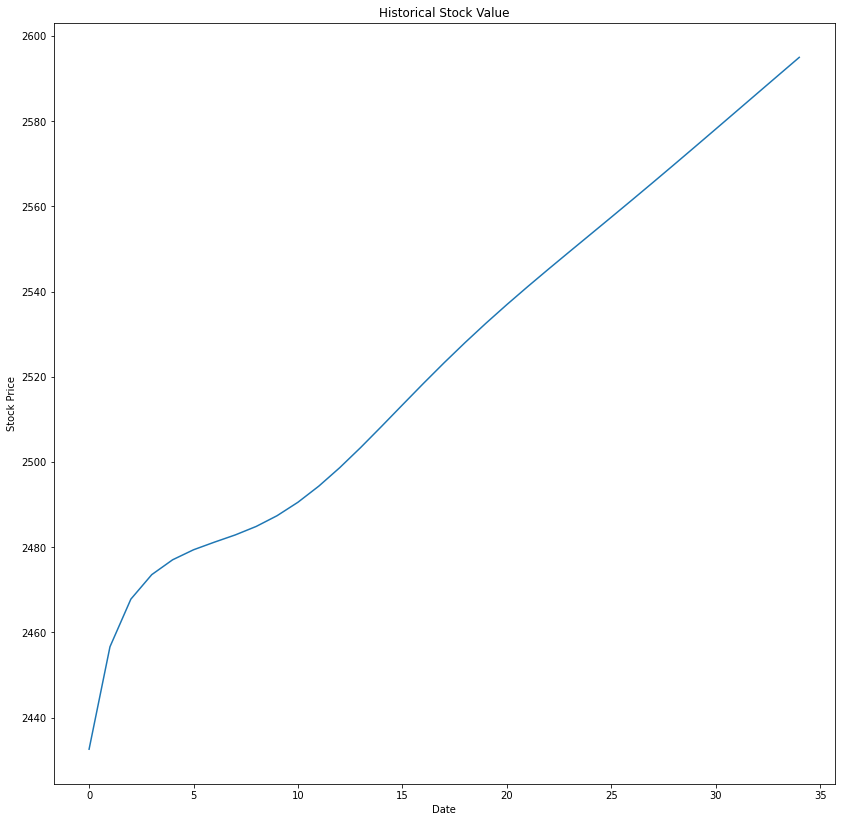

In [45]:
plt.figure(figsize=(14,14))
plt.plot(df_test['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [46]:
final = pd.DataFrame()

In [47]:
final['Date'] = df_test['Date']
final['Close'] = df_test['Close']

In [48]:
final.head()

,Date,Close
0,2022-08-01,2432.584627
1,2022-08-02,2456.629360
2,2022-08-03,2467.808772
3,2022-08-04,2473.560404
4,2022-08-05,2477.051152


In [49]:
final.dtypes


Date      object
Close    float64
dtype: object

In [50]:
final.to_csv('output.csv')